# The first part of the assignment, IDS 2021-2022
In this Jupyter notebook, please, document your results and the way you have obtained them. You can use the attached yaml file to build Python environment for this assignment. Another option (and the easiest way) is to just use the _Python environment_ provided at the beginning of the course and then use *pip install* to install *p_decision_tree* library. You can find the required yaml file in the folder of this assignment. In addition to the _Jupyter notebook_, please submit _one zip-file_ containing all datasets and other outputs you have generated (such as pdf, jpg, and others). Please make sure that the datasets and other outputs are easily identifiable, i.e. use names as requested in the corresponding question.

This is the _only_ submission that is required (Jupyter notebook + zip-file). A separate report is _not_ needed and will not be considered for grading. 

Give your commented Python code and answers in the corresponding provided cells. Make sure to answer all questions in a clear and explicit manner and discuss your outputs. _Please do not change the general structure of this notebook_. You can, however, add additional markdown or code cells if necessary. <b>Please DO NOT CLEAR THE OUTPUT of the notebook you are submitting! </b>

<font color="red"> *Please make sure to include the names and matriculation numbers of all group members in the slot provided below.* </font> If a name or a student id is missing, the student will not receive any points.

Hint 1: While working on the assignment, you will get a better understanding of the dataset. Feel free to generate additional results and visualizations to support your answers. For example, this might be useful regarding data modification, data simplification, or output interpretation. <font color="red">Ensure that all your claims are supported.</font>

Hint 2: <font color="red">Plan your time wisely. </font> A few parts of this assignment may take some time to run. It might be necessary to consider time management when you plan your group work.

Hint 3: RWTHmoodle allows multiple submissions, with every new submission overwriting the previous one. <b>Partial submissions are therefore possible and encouraged. </b> This might be helpful in case of technical issues with RWTHMoodle, which may occur close to the deadline.


<font color="red"><b>Student Names and IDs:
    
    1. Lorraine Saju (426927)
    
    2. Nhan Le (402196) 
    
    3. Giang Nguyen (433484)

## Dataset
Almost all of us have the experience of being stuck in an airport because our flight was delayed or canceled. As a person who knows how to analyze data, we all wondered if we could have predicted it if we had access <b>to</b>  the data. This is your chance to find out.

In this assignment, you will perform some analysis on a flight delay dataset. This dataset is provided by the U.S. Department of Transportation's (DOT) Bureau of Transportation Statistics (BTS) which tracks the on-time performance of domestic flights operated by large air carriers. In the following, you can find the definition of some of the features in this dataset.

<b>Airline delay.</b> 
This type of delay pertains to the status within the airline’s control. For example, problems with maintenance and crew, cleaning within the cabin, fueling, and baggage loading could all be contributing factors to a delayed flight. 

<b>Security delay.</b> 
Security delay is caused by evacuation of a terminal or concourse, re-boarding of an aircraft because of a security breach, inoperative screening equipment, and/or long lines in excess of 29 minutes at screening areas.

<b>Weather delay.</b> 
Weather delay is caused by extreme or hazardous weather conditions that are forecasted or manifest themselves on point of departure, enroute, or on point of arrival.

<b>Late aircraft delay.</b> 
Arrival delay at an airport due to the late arrival of the same aircraft at a previous airport. The ripple effect of an earlier delay at downstream airports is referred to as delay propagation.

<b>Taxi in/out.</b> 
Taxi time is the total time of an aircraft's movement on the ground.

<b>Wheels-off.</b> 
The time that an aircraft lifts off from the origin airport.
    
<b>Wheels-on.</b> 
 The time that an aircraft lands at the designated airport.

<b> Air time.</b> 
The time from the moment an aircraft leaves the surface until it comes into contact with the surface at the next point of landing.

## Question 0 - Preprocessing of the Dataset 
 Carry out the following preprocessing steps before starting the analysis:
 - Select 95% of the dataset provided for this assignment by random sampling.
     - Use one of the group member's student numbers as a seed.
     - Rename the newly generated dataset (which contains 95% of the data) to <b>sampled_data</b>.
 - If it is not mentioned otherwise, you should always use <b>sampled_data</b> created in this step as input for the questions.
 
<font color="red">Note: Your assignment would not be graded if this step is not done. </font>

In [191]:
import pandas as pd

# getting rid of some warnings
pd.options.mode.chained_assignment = None
seed = 433484
rerun = False # set to true to skip the heavy computations, if set to False will do the heavy computations

sampled_data = pd.read_csv("dataset.csv")
sampled_data = sampled_data.sample(frac=.95, random_state=seed)
print("Done")

Done


## Question 1 - Insights into the Data (20 points):

### Setting of this Question:
We want to make ourselves familiar with the data. To this end, we start with an explorative data analysis. You are more than welcome to provide a deeper analysis and generate more visualizations to understand the data better. Please follow the next two parts.

### Part 1: Basic data analysis
To investigate the data, we take a look at some of the basic statistics and properties of the data.

#### a) Unique values: 
Mention the unique values for cancelation reason in the <b>sampled_data</b>. Also, mention the unique values of this feature where the flights have been canceled and where the flights have not been canceled. Explain the difference.

In [192]:
all_cancellation_reasons = sampled_data.CANCELLATION_REASON.unique()
fl_cancelled_cancel_reasons = sampled_data.CANCELLATION_REASON[sampled_data.CANCELLED == 1].unique()
fl_not_cancelled_cancel_reasons = sampled_data.CANCELLATION_REASON[sampled_data.CANCELLED == 0].unique()
print("Cancellation reason {}".format(all_cancellation_reasons))
print("Cancelled reason {}".format(fl_cancelled_cancel_reasons))
print("Not Cancelled reason {}".format(fl_not_cancelled_cancel_reasons))

Cancellation reason ['B' 'A' 'N' 'C' 'D']
Cancelled reason ['B' 'A' 'C' 'D']
Not Cancelled reason ['N']


Answer:

Those cancellation reasons are abbreviations for different scenarios. According to the publisher of the original data set they can be understood as

 * A = carrier
 * B = weather
 * C = NAS
 * D = security
 * N = no data given

As one can see, reasons A-D are valid reasons to cancel a flight. Obviously if the flight was not cancelled in the first place, there will be no data. So N = no data...


#### b) Null values: 
Remove all the rows with null values from the <b>sampled_data</b>. Let's call this new dataset <b>no_null_data</b>. Show the unique values for cancelation reason in <b>no_null_data</b> and compare them to the unique values in <b>sampled_data</b>. Can you explain the difference? 

In [193]:
no_null_data = sampled_data.dropna()
nonull_cancellation_reasons = no_null_data.CANCELLATION_REASON.unique()
sampled_data_cancellation_reasons = sampled_data.CANCELLATION_REASON.unique()
print("Cancellation reasons [no_null_data] {} But was it ever cancelled? {}".format(nonull_cancellation_reasons,
                                                                            no_null_data.CANCELLED.unique()))
print("Cancellation reasons [sampled_data] {}".format(sampled_data_cancellation_reasons))
print(sampled_data.isna().any())


Cancellation reasons [no_null_data] ['N'] But was it ever cancelled? [0]
Cancellation reasons [sampled_data] ['B' 'A' 'N' 'C' 'D']
Unnamed: 0                      False
Unnamed: 0.1                    False
YEAR                            False
MONTH                           False
DAY                             False
DAY_OF_WEEK                     False
AIRLINE                         False
FLIGHT_NUMBER                   False
TAIL_NUMBER                      True
ORIGIN_AIRPORT                  False
DESTINATION_AIRPORT             False
SCHEDULED_DEPARTURE             False
DEPARTURE_TIME                   True
DEPARTURE_DELAY                  True
TAXI_OUT                         True
WHEELS_OFF                       True
SCHEDULED_TIME                   True
ELAPSED_TIME                     True
AIR_TIME                         True
DISTANCE                        False
WHEELS_ON                        True
TAXI_IN                          True
SCHEDULED_ARRIVAL               F

Answer:

One can see that `no_null_data` contains no flights that have been cancelled! On the other hand we know that sample_data has flights that have been cancelled. Looking on the columns, we can see that columns containing flight specific data such as `AIR_TIME` and so on actually contain `null` values. These rows should be droped when creating `no_null_data` but also if we only what row of flight that have not been cancelled.

#### c) Boxplot:
Use <b>no_null_data</b> dataset to create a new dataset including all the flights from airline 'EV' which have at least 2 hours but at most 6 hours of delay. Let's call this data <b>ev_data</b>.

Use a boxplot to create two datasets from <b>ev_data</b> by finding and removing the outliers from the following attributes:
   - Late aircraft delay, call this dataset <b>cleaned_data_late_aircraft</b>,
   - Air system delay, call this dataset <b>cleaned_data_air_system</b>.
    
Note that based on the boxplot, the values greater than the upper-whisker and lower than the lower-whisker are considered as outliers.

Strategy: Let's make smaller tasks to solve this.
1. create ev_data and its boxplot
2. remove the outliners for specified **2 attributes** and create **2 data sets** based on rest that is left
3. do a small sanity / correctness check

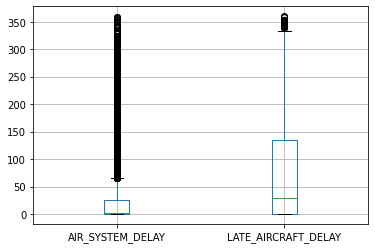

In [194]:
# 1 create ev_data and its boxplot
ev_data = no_null_data.query("AIRLINE == 'EV' & ARRIVAL_DELAY >= 120.0 & ARRIVAL_DELAY <= 360.0 ")
# we will keep the boxplot dict 'di' as it contains our outliners
ax, di = ev_data.boxplot(column=['AIR_SYSTEM_DELAY', 'LATE_AIRCRAFT_DELAY',], return_type="both")
# now we can save the outliners
outliners_air_sys = di["fliers"][0].get_ydata()
outliners_late_air = di["fliers"][1].get_ydata()

In [195]:
# 2: we only keep rows that feature in not in our outliner set
cleaned_data_late_aircraft = ev_data.loc[~ev_data['LATE_AIRCRAFT_DELAY'].isin(outliners_late_air)]
cleaned_data_air_system = ev_data.loc[~ev_data['AIR_SYSTEM_DELAY'].isin(outliners_air_sys)]

In [196]:
# 3 small sanity check: 
# for AIR_SYSTEM_DELAY we can see that all values of our cleaned data should be smaller than the smallest outliner
# same holds for LATE_AIRCRATE_DELAY
assert(min(outliners_late_air) > cleaned_data_late_aircraft.loc[:,'LATE_AIRCRAFT_DELAY'].max())
assert(min(outliners_air_sys) > cleaned_data_air_system.loc[:,'AIR_SYSTEM_DELAY'].max())
print("Done")

Done


#### d) Basic statistics: 
Compare basic statistical features of arrival delay (median, mean, and mode, standard deviation, variance) in the <b>ev_data</b>, <b>cleaned_data_late_aircraft</b>, and <b>cleaned_data_air_system</b>. 

Interpret the differences for these statistical values between these three datasets. 

In [197]:
median = [
    ev_data['ARRIVAL_DELAY'].median(),
    cleaned_data_late_aircraft['ARRIVAL_DELAY'].median(),
    cleaned_data_air_system['ARRIVAL_DELAY'].median()
]

mean = [
    ev_data['ARRIVAL_DELAY'].mean(),
    cleaned_data_late_aircraft['ARRIVAL_DELAY'].mean(),
    cleaned_data_air_system['ARRIVAL_DELAY'].mean()
]

mode = [
    ev_data['ARRIVAL_DELAY'].mode()[0],
    cleaned_data_late_aircraft['ARRIVAL_DELAY'].mode()[0],
    cleaned_data_air_system['ARRIVAL_DELAY'].mode()[0]
]

std = [
    ev_data['ARRIVAL_DELAY'].std(),
    cleaned_data_late_aircraft['ARRIVAL_DELAY'].std(),
    cleaned_data_air_system['ARRIVAL_DELAY'].std()
]

var = [
    ev_data['ARRIVAL_DELAY'].var(),
    cleaned_data_late_aircraft['ARRIVAL_DELAY'].var(),
    cleaned_data_air_system['ARRIVAL_DELAY'].var()
]

print("statistic [ev_data, cleaned_data_late_aircraft, cleaned_data_air_system]")
print("Median {}".format(["{0:0.2f}".format(i) for i in median]))
print("Mean   {}".format(["{0:0.2f}".format(i) for i in mean]))
print("Mode   {}".format(["{0:0.2f}".format(i) for i in mode]))
print("Std    {}".format(["{0:0.2f}".format(i) for i in std]))
print("Var    {}".format(["{0:0.2f}".format(i) for i in var]))

# some more information to better understand the difference
print("size   {}".format([ev_data.shape[0], 
                          cleaned_data_late_aircraft.shape[0], 
                          cleaned_data_air_system.shape[0]]))


statistic [ev_data, cleaned_data_late_aircraft, cleaned_data_air_system]
Median ['165.00', '165.00', '164.00']
Mean   ['181.84', '181.49', '181.37']
Mode   ['121.00', '121.00', '121.00']
Std    ['55.07', '54.60', '55.10']
Var    ['3032.96', '2981.02', '3036.24']
size   [10271, 10250, 8577]


Answer: 

Median:\
We see that the median is around 165 and 164. As median splits the data set into 50/50, we can say that removing outliners of `AIR_SYSTEM_DELAY` has and greater impact on `ARRIVAL_DELAY` than outliners of `LATE_AIRCRAFT_DELAY`. Also we can say that the outliners of `AIR_SYSTEM_DELAY` must more related to `ARRIVAL_DELAY >= 165` since removing them reduced our median.

Mean:\
Here we have a similar observation. But we can now say that `AIR_SYSTEM_DELAY` and `LATE_AIRCRAFT_DELAY` tend to relate to flights that have a flight `ARRIVAL_DELAY > 181` since removing them decreases our mean. 

Mode:\
Mode is the value that occurs the most in the data sets. We can see that 121 still stays the mode. Based on that we conclude that both `AIR_SYSTEM_DELAY` (more) and `LATE_AIRCRAFT_DELAY` (less) dont relate to this `ARRIVAL_DELAY` significantly which coincide with our first to observations.

Std:\
The difference in the std shows that when dropping outliners of `LATE_AIRCRAFT_DELAY` the spread of data decreases, while dropping outliners of `AIR_SYSTEM_DELAY` the spread of data increases. We think that this can give a hint on how `ARRIVAL_DELAY` relates to these features. For `LATE_AIRCRAFT_DELAY` we think that the outliners correspond to `ARRIVAL_DELAY` outside of the std range (mainly bigger than ≈ 181+55) because the std decreases. Interestingly this does not apply to the outliners of `AIR_SYSTEM_DELAY`. They also often relate to `ARRIVAL_DELAY`s inside the std range ≈ (181-55, 181+55). 

Var:\
It is just std squared. We wont interpret this since we already did!

**Conclusion:** \
Removing possible delays of a flight improves the average flight delay. This is not surprising! But we found out that `LATE_AIRCRAFT_DELAY` tend occur less (see size) but correlates to quite big `ARRIVAL_DELAY`s outside the std range (see decrease of std). This kind of makes sense since an airplane has to be checked, fueled and boarded which are processes that are already on a tight schedule to save money! Therefore having an late airplane can cause bigger delays flights with that airplane while `AIR_SYSTEM_DELAY`s fankly happens more often (see size) but can be sometimes can be compensated and result in delays inside our std range. This also checks out as traffic controllers will be instructed to adapt to new situations and coordinates the airplanes.

### Part 2: Basic visualization

#### a) Mean visualization: 
Visualize and compare the mean of arrival delay per month in the <b>no_null_data</b>. Just based on this information, if you prefer the minimum delay, which two months would be a good option to book a ticket and which two months are the worst.

<AxesSubplot:xlabel='Months'>

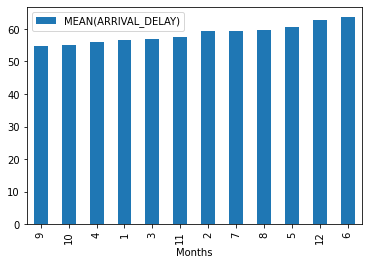

In [198]:
# first we collect months and their means
months = no_null_data['MONTH'].unique()
means =  [no_null_data.query("MONTH == {}".format(i)) for i in months]
means = [data['ARRIVAL_DELAY'].mean() for data in means]
# sorting will help us interpret later
dataframe = pd.DataFrame(data={'Months': months, 'MEAN(ARRIVAL_DELAY)':means}).sort_values('MEAN(ARRIVAL_DELAY)')
dataframe.plot(x='Months', y='MEAN(ARRIVAL_DELAY)', kind='bar')

Answer:

From our plot- 
* best 2 months to book are september and october
* worst 2 months to book are decembber and june

#### b) Mean visualization:
Visualize and compare the mean of weather delay per month in the <b>no_null_data</b>. Which month has the minimum and which month has the maximum average weatherdelay? 

<AxesSubplot:xlabel='Months'>

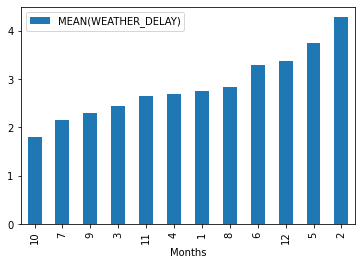

In [199]:
months = no_null_data['MONTH'].unique()
means =  [no_null_data.query("MONTH == {}".format(i)) for i in months]
means = [data['WEATHER_DELAY'].mean() for data in means]
#create DataFrame for simplier plot
dataframe = pd.DataFrame(data={'Months': months, 'MEAN(WEATHER_DELAY)':means}).sort_values('MEAN(WEATHER_DELAY)')
dataframe.plot(x='Months', y='MEAN(WEATHER_DELAY)', kind='bar')

Answer: 

From our plot:
*  minimum: october
*  maximum: february

#### c) Interpretation:
Based on the visualization of the two previous tasks, can you detect any possible relationship between the arrival delay and weather delay per month? If yes, please explain.

Answer:

Looking at the bars we can say that the 4 months with lowest `WEATHER_DELAY` (10,7,9,3) also contains some of the months with lowest `ARRIVAL_DELAY` (9, 10). While on the other side the 4 Months with highest `WEATHER_DELAY` (6,12,5,2) also contains some of the months with the highest `ARRIVAL_DELAY` (5,12,6). So we can say that there is a light visual correlation between bad weather and arrival delays which in reality makes a lot of sense. Of course we can calculate the correlation between those dataset to verify our suspicion!
(Spoiler: We will do this later on when we decide what feature to choose for the model training)

#### d) Mean visualization: 
Now visualize the mean of arrival delay per day of the week (per 7 week days) in each month. Based on this information, which combination of days of week and months should be avoided to decrease the possibility of the arrival delay the most? Provide 5 combinations of days of week and months.

Strategy: 
1. First get the data into months = 1d
2. then for each month group the data into day of week = 2d
3. take the mean
4. plot it
5. flatten our structure from 2d to 1d such as we have labels with month_day_of_week
6. sort this flattened structure and take the lowest 5 elements!

         6_2      5_1       12_7        6_1       12_1
0  67.165382  68.7055  68.727414  69.854531  70.936028


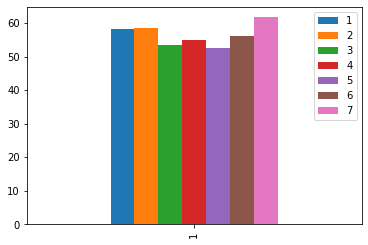

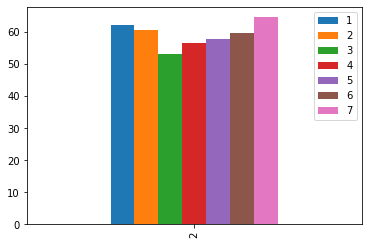

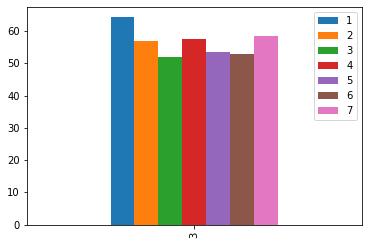

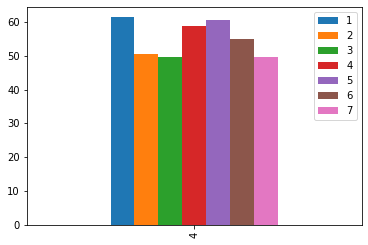

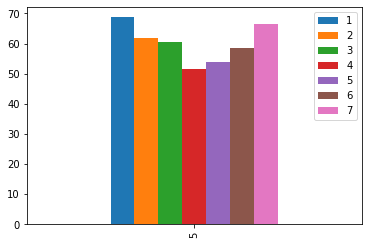

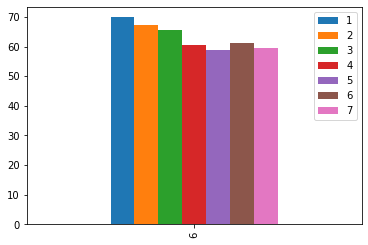

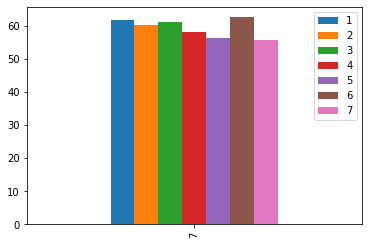

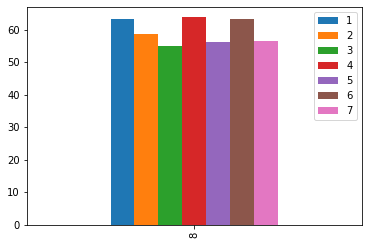

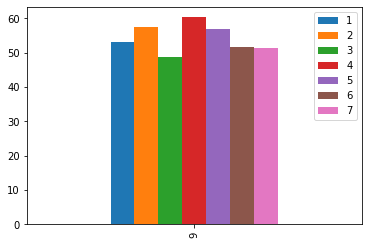

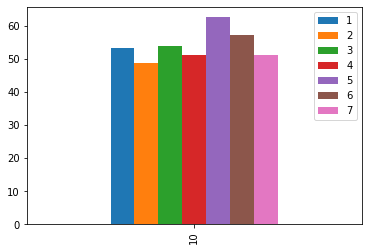

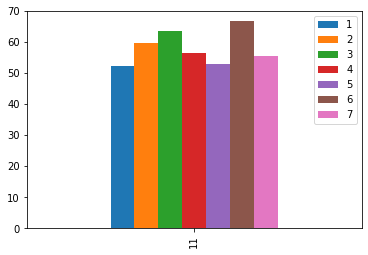

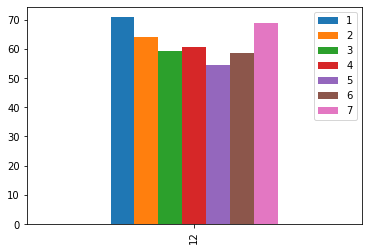

In [200]:
# 1. getting the data into months
months = sorted(no_null_data['MONTH'].unique())
months_data =  [no_null_data.query("MONTH == {}".format(i)) for i in months]

# 2 grouping this data into day of week so that array will be [DAY_OF_WEEK][MONTH]
day_of_week = sorted(no_null_data['DAY_OF_WEEK'].unique())
months_data_divided = [[data.query("DAY_OF_WEEK == {}".format(day)) for data in months_data]#
                      for day in day_of_week]

# 3 calculate the means by iterating
means = {}
for day in months_data_divided:
    # this_day the same over this iteration, no matter the entry
    # just take the first one
    this_day = day[0]['DAY_OF_WEEK'].unique()[0]
    # prepare our means
    mean_of_day_in_month = {}
    # lets go through all months having this_day
    for month in day:
        # now this_month is the same, no matter the entry
        this_month = month['MONTH'].unique()[0]
        mean_of_day_in_month["{}".format(this_month)] = month['ARRIVAL_DELAY'].mean()
    # we basically say that day d will have means in months [m1,m2,...]
    means["{}".format(this_day)] = mean_of_day_in_month

# since we want to plot by months (not days), we should inverse the dict
r_means = {i: s.to_dict() for i, s in pd.DataFrame(means).T.iteritems()}

# 4 we can now plot it
for m in r_means:
    dataf = pd.DataFrame(r_means[m], index=[m])
    #print(dataf)
    dataf.plot(kind='bar')

# 5 we can flatten that dict to get the minimums quickly, also sort it while we at it
flat_mean = pd.json_normalize(r_means, sep='_').sort_values(by=0, axis=1)

# 6 now we can just see the highes 5 entries since they have most avg delay
print(flat_mean.iloc[:,-5:])

Answer: 

The best worst to combinations to travel are Tuesdays in June, Mondays in May, Sundays in December, Mondays in June, Mondays in December

#### e) Distribution:
 In <b>no_null_data</b>, plot the distribution of weather delay for those flights with at least 3 hours of weather delay.

Text(0.5, 0, 'WEATHER_DELAY')

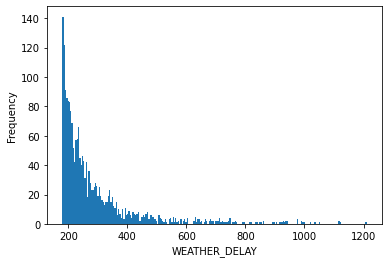

In [201]:
weather_delay = no_null_data.query("WEATHER_DELAY >= 180.0")
x= len(ev_data["WEATHER_DELAY"].unique())
t = weather_delay["WEATHER_DELAY"].plot.hist(bins=x)
t.set_xlabel("WEATHER_DELAY")

#### f) Monthly distribution:
Plot the monthly distribution of weather delay in one figure where weather delay is more than 3 hours in <b>no_null_data</b>.

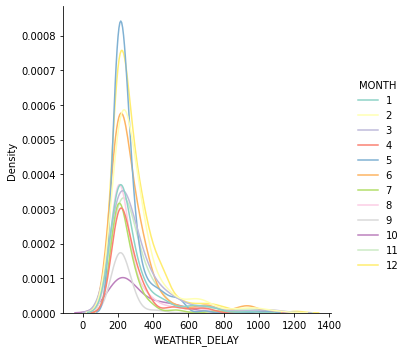

In [208]:
#get months
months = sorted(no_null_data['MONTH'].unique())
# we tried different gradient to make the visuals better, no real improvement
color_palette = sn.color_palette("Set3", 12)
# query rows with weather delay over 3h
weather_delay = no_null_data.query("WEATHER_DELAY >= 180.0")

sn.displot(data=weather_delay, x='WEATHER_DELAY', palette = color_palette, hue="MONTH", kind='kde')

# looks bad

#### g) Joint distribution:
Explore the distribution of weather delay and arrival delay together in the <b>no_null_data</b> for airlines 'EV' and 'VX', considering only the flights that the arrival delay is more than 6 hours. Can you find any similarities or differences among them? Please explain.

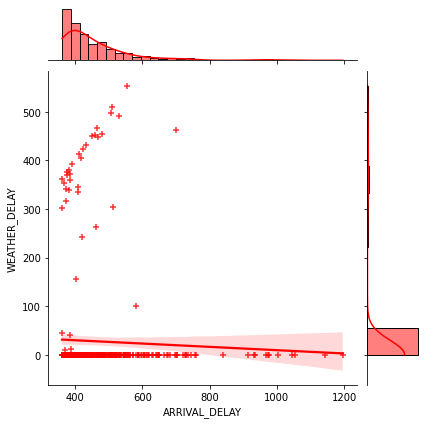

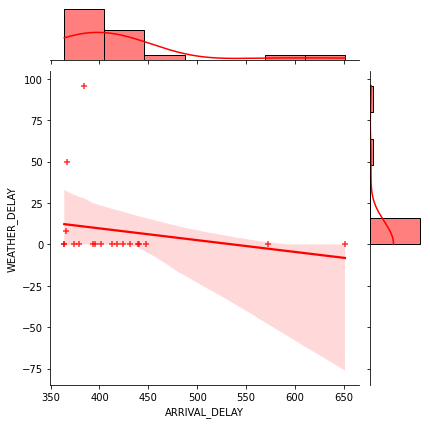

In [41]:
# first criteria: ARRIVAL_DELAY > 6h
f1 = no_null_data.query("ARRIVAL_DELAY > 360.0")

# split into EV and VX Airline
ev = f1.query("AIRLINE == 'EV'")
vx = f1.query("AIRLINE == 'VX'")

# plot the joint dist using seaborn.jointplot
import seaborn as ss
ss.jointplot(data=ev, x="ARRIVAL_DELAY",y="WEATHER_DELAY",kind='reg',color='r',marker="+")
ss.jointplot(data=vx, x="ARRIVAL_DELAY",y="WEATHER_DELAY",kind='reg',color='r',marker="+")

Answer:

For EV as one can see: extreme long arrival delays (eg. >550min) the impact of weather delays are (almost) negligible as they are almost always close to 0. Now for arrival delays >360 min (and below 550min) we can see that most of the arrival delays are not caused by weather delays because most late flights have in fact 0 weather delay, but we can see that there is an almost linear increase of weather delay time between 360min and 500min which in total matches the arrival delay! So if you have a delay cause by weather which takes long to resolve(>360min), than your arrival delay in total tend to be mainly cause by that weather delay.

For VX it is hard to give a sophisticated interpretation as only few data is available. we can observe a similar behavior as above in regards that only flights with a releatively small arrival delay (in sense that they already have a arrival delay > 360min) have been partly caused by weather conditions. But here we cannot say that the total arrival delay is likely to be caused by the weather conditions! Also the majority of flights with arrival delay >360min have a weather delay of 0!


## Question 2 - Decision Trees (10 points):

### Setting of this Question:
We want to buy a ticket from 'UA' airline. As we are not a big fan of flights that have a long delay, we have decided to use a decision tree to find the best time to buy the ticket. Our plan is to use a decision tree to predict the arrival delay. But first, we need to preprocess the data. Please do the following tasks.  

#### a) Data preprocessing: 
Use <b>no_null_data</b> for this task and filter it such that the resulting dataset contains only the flights from 'UA' airline that has some (non zero) arrival delay. 

First, discretizing the arrival delay as follows:
 - if the delay is at most 45 minutes, the value of the new attribute should be 'acceptable_delay',
 - else, the value of the new attribute should be 'unacceptable_delay',
 
Let's call this new categorical feature 'DELAY'.

Second, discretize the distance into two equal-width bins and name them 'short' and 'long'. Let's call this new feature 'DISTANCE_CATEGORY'.

In [45]:
# creating new feature 'DELAY'
ua_data = no_null_data.query("AIRLINE == 'UA' & ARRIVAL_DELAY > 0")
ua_data.loc[ua_data.loc[:,'ARRIVAL_DELAY'] <= 45.0, 'DELAY'] = 'acceptable_delay'
ua_data.loc[ua_data.loc[:,'ARRIVAL_DELAY'] >  45.0, 'DELAY'] = 'unacceptable_delay'

# we will use min, max to split data into 2 equal width bins
new_metric = ua_data["DISTANCE"].min()+((ua_data["DISTANCE"].max()-ua_data["DISTANCE"].min() ) /2 )
n_new_med = len(ua_data.query("DISTANCE == @new_metric"))

# put all <new_metric into short bin 
ua_data.loc[ua_data.loc[:,'DISTANCE'] < new_metric, 'DISTANCE_CATEGORY'] = 'short'
# put all >new_metric into long bin
ua_data.loc[ua_data.loc[:,'DISTANCE'] > new_metric, 'DISTANCE_CATEGORY'] = 'long'
# put a all ==new_metric into short bin
ua_data.loc[ua_data.loc[:,'DISTANCE'] == new_metric, 'DISTANCE_CATEGORY'] = 'short'


# lets verify everything
print("{}, {}".format(new_metric,n_new_med)) 
print("long: {}, short: {}".format(
                len(ua_data.loc[ua_data['DISTANCE_CATEGORY'] == 'short']) ,
                len(ua_data.loc[ua_data['DISTANCE_CATEGORY'] == 'long'])
                ))

2535.0, 0
long: 74915, short: 4662


#### b) Decision tree:
Consider the extended dataset from the previous task (task a). Use 'SCHEDULED_DEPARTURE_CATEGORY', 'DISTANCE_CATEGORY', and 'DAY_OF_WEEK' as descriptive features. Generate a decision tree in which the minimum number of samples for splitting is 1000.

Note: for this task, you must use p_decision_tree library. You can use the attached yaml file to build Python environment for this task. The easiest way is to just use *pip install*.

----------
Tree with min number of samples for splitting = 1000



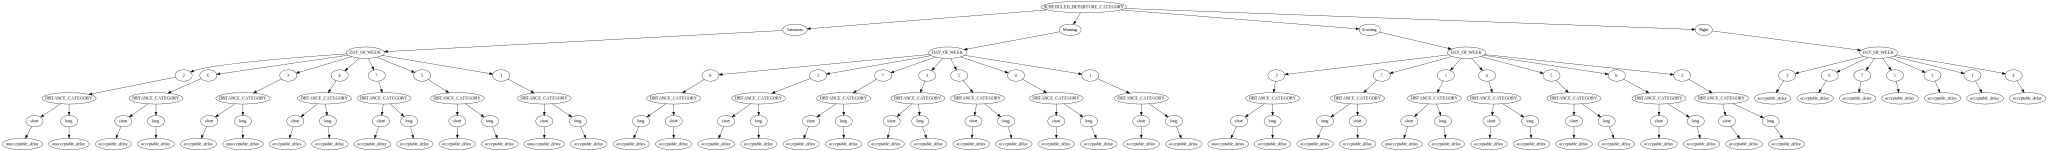

System entropy for tree: 0.9944541786165914


In [47]:
from p_decision_tree.DecisionTree import DecisionTree

# Create decision tree
tree_descriptive_features = ['SCHEDULED_DEPARTURE_CATEGORY', 'DISTANCE_CATEGORY', 'DAY_OF_WEEK']
tree_target_feature = 'DELAY'
tree_x = ua_data[tree_descriptive_features].astype(str).values
tree_y = ua_data[tree_target_feature].astype(str).values

tree = DecisionTree(tree_x.tolist(), tree_descriptive_features, tree_y, "entropy")
tree.id3(0, 1000)
print("----------\nTree with min number of samples for splitting = 1000\n")
dot1 = tree.print_visualTree(render=False)
dot1.render('visuals/tree.gv')
display(dot1)
print("System entropy for tree:", format(tree.entropy))


#### c) ID3 feature selection:
In the generated decision tree, what is the best feature (based on entropy) for splitting the tree in the second round of ID3 considering the value of the feature chosen in the first round of ID3?       

Answer:

First round is `SCHEDULED_DEPARTURE_CATEGORY`. Second round choose `DAY_OF_WEEK`!

#### d) Rule interpretation:
Based on the discovered decision tree, which conditions are more prone to more than 45 minutes delay. Explain two rules.

Answer:

List of rules:
 * [Afternoon, Tuesday, short & long flights]
 * [Afternoon, monday, short], 
 * [Afternoon, Wednesday, long], 
 * [Evening, Tuesday, short], 
 * [Evening, Monday, short]

Which can be summarized as:
1. Short evening and afternoon flights on Mondays and Tuesdays.
2. Long afternoon flights on Tuesdays and Wednesdays.

For example **[Evening, Monday, short]** stands for flights that are booked for Evening on Mondays and have a distance smaller than 2535 miles between origin and destination airport. **[Evening, Tuesday, short]** stands for evening flights on Tuesdays with a distance smaller than 2535 miles between origin and destination airport. For these flights you are more prone tp have arrival delays over 45 min.


## Question 3 - Classification Models and Prediction (50 Points):

### Background of this Question:
You heard from a friend that you are entitled to receive a payment of at least 150€ if your flight is delayed by more than 3 hours. Very excited, you are reminded of your IDS course and the flight dataset you had to analyze back then. You start to imagine a model trained on these flights that can predict if your future flights are delayed by three hours and, basically, allow you to travel the world for free if it chooses these flights correctly. You remember your IDS lecture and what you have to do to make your dream come true: You want to prepare the data accordingly, i.e., you model the target variable of being delayed by more than 3 hours and you choose and model the descriptive variable that you want to use for predicting delay. For the evaluation of your models, you have to choose an evaluation metric that describes whether the flights chosen by your model are actually delayed by <b> at least </b> 3 hours. Moreover, for the models, you want to train different regression, SVM, and neural network models with different parameters and find the best one. In the end, you should calculate for which flight price your model lets you travel the world for free.
### Parts of this question:
We want you to systematically approach the questions. So we take the following steps (parts): preparing the data, what is the target variable, what are your descriptive variables, what is the evaluation measure you are trying to maximize, and what is the baseline you should at least be better than?

### Part 0: Preparing the dataset

Load the classification dataset; i.e., <b>flights_classifying.csv</b>.

Done
Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'YEAR', 'MONTH', 'DAY',
       'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER', 'TAIL_NUMBER',
       'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE',
       'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF',
       'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'WHEELS_ON',
       'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY',
       'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON', 'AIR_SYSTEM_DELAY',
       'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY',
       'WEATHER_DELAY', 'DAY_YEARLY', 'WEEK', 'SCHEDULED_DEPARTURE_CATEGORY',
       'REIMBURSMENT'],
      dtype='object')


<AxesSubplot:>

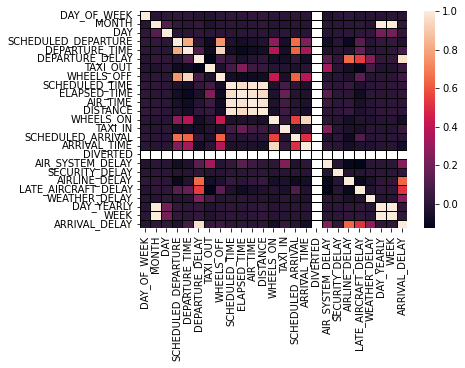

In [211]:
flights_classifiying = pd.read_csv("flights_classifying.csv")
print("Done")
import seaborn as sn
print(flights_classifiying.columns)
corrM = flights_classifiying[['DAY_OF_WEEK', 'MONTH', 'DAY', 'SCHEDULED_DEPARTURE', 
                    'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF',
                    'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'WHEELS_ON',
                    'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'DIVERTED',
                    'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY',
                    'WEATHER_DELAY', 'DAY_YEARLY', 'WEEK','ARRIVAL_DELAY',
                    ]].corr()
sn.heatmap(corrM, linewidths=1, linecolor="black", xticklabels=True, yticklabels=True)

Randomly order the data points using one of the group member's students as the random state.

In [213]:
flights_classifiying = flights_classifiying.sample(frac=1, random_state=seed)
print("Done")


Done


### Part 1: Designing your variables and evaluation

#### a) Target feature:
Design your target feature such that you can predict whether a flight is delayed by more than 3 hours or not and add it to the dataset. Drop all data points that contain a canceled flight.

In [218]:
flights_classifiying.drop(flights_classifiying[flights_classifiying["CANCELLED"] == 1].index, inplace=True)
flights_classifiying.loc[flights_classifiying["ARRIVAL_DELAY"]>  180, "TARGET" ] = 1
flights_classifiying.loc[flights_classifiying["ARRIVAL_DELAY"]<= 180, "TARGET" ] = 0

print("Total TARGET 1: {}".format(len(flights_classifiying.query("TARGET == 1"))))
print("Total TARGET 0: {}".format(len(flights_classifiying.query("TARGET == 0"))))
assert(len(flights_classifiying.query("TARGET == 1")) + len(flights_classifiying.query("TARGET == 0")) == len(flights_classifiying))

if not rerun:
    # saving it to file to use with external script
    print("Saving to file 'data/shuffled_with_target.csv'")
    flights_classifiying.to_csv("data/shuffled_with_target.csv")
print("Done")

Total TARGET 1: 37819
Total TARGET 0: 487765
Saving to file 'data/shuffled_with_target.csv'
Done


#### b) Descriptive features:
Please select your descriptive features and motivate your choice. Always consider the setting and whether choosing these features makes sense concerning the setting of the question. Apply the necessary transformations.

In [ ]:
# Your code


Split your data into training and testing data, with 85% of the dataset going to testing data.

In [ ]:
# Your code


#### c) Evaluation metric
Discuss and choose an evaluation metric that you can evaluate your predictions against. Hint: Be aware of the setting of this questions, i.e., what your goal is.

In [ ]:
#you may put code here, if necessary

    Your answer:
    
    

#### d) Evaluation baseline
Calculate the baseline of the evaluation metric, i.e., a value you can achieve without any model by basic data analysis.

In [ ]:
# Your code


    Your answer:
    
    

### Part 2: Model Selection

For each of the classifiers: regression, SVM and neural network, train a model. For each of these models, select and fine-tune the parameters such that the result w.r.t. your evaluation metric is as good as possible. You have to k-fold cross-validate (reasonable choice of k) your training and you have to test your predictions on the test dataset.

Hint: There might be some problems with class imbalance when you fit your models.


#### a) Regression:
Train, finetune and evaluate a regression model.

In [ ]:
# Your code


#### b) SVM:
Train, finetune and evaluate an SVM.
In this task we advise you to use only a subset of the training dataset, i.e., 10000 datapoints, since this is computationally very expensive.

In [ ]:
# Your code


#### c) Neural Network:
Train, finetune and evaluate a neural network. You do not need to test all the hyper-parameters, just a reasonable amount.

Hint: You might encounter some problems due to the class imbalance of delayed and undelayed flights.

In [ ]:
# Your code


### Part 3: Final conclusion
Describe your results for different models and your performance in comparison to the baseline. Are you able to increase the likelihood of getting a delayed flight with your recommendation in comparison to a random selection? What is the flight price for which your model is profitable?

In [ ]:
# your code if needed

    Your answer:
    
    

## Question 4 - Clustering (20 Points):

### Setting of this Question:
There are different types of delay in the dataset. If a flight is delayed before departure, the pilot might fly faster to compensate for the delay. Due to the type of delay and different characteristics of a flight, it might be possible to compensate for the delay or not. In this task we are going to investigate if the compensation for the delay is possible considering different delay types that occurs during a flight.

To prepare the dataset for the analysis, first perform the following steps:

- Consider <b>no_null_data</b> from the first question in which the null values of the dataset are removed.
- Remove all the flights with more than 600 minutes weather delay <b>or</b> with more than 600 minutes late arrival delay. 
- Create a new feature, 'AIR_TIME_DELAY' indicating the difference between elapsed time and scheduled time (i.e., 'ELAPSED_TIME' - 'SCHEDULED_TIME'). This feature shows the difference between real and planned duration. Explain what does the negative and positive value of this feature mean?
- Name the new dataset as <b>clustering_dataset</b>. Print the number of rows and columns in this dataset. Print the first 10 rows of the dataset such that 'AIR_TIME_DELAY', 'SCHEDULED_TIME', and 'ELAPSED_TIME' are readable.

In [55]:
clustering_dataset = no_null_data.loc[(no_null_data['WEATHER_DELAY'] <= 600)].loc[(no_null_data['ARRIVAL_DELAY'] <= 600)]
clustering_dataset['AIR_TIME_DELAY'] = clustering_dataset['ELAPSED_TIME'] - clustering_dataset['SCHEDULED_TIME']

clustering_dataset[["AIR_TIME_DELAY", 'SCHEDULED_TIME', 'ELAPSED_TIME']].head(10)

,AIR_TIME_DELAY,SCHEDULED_TIME,ELAPSED_TIME
576244,46.0,100.0,146.0
400500,1.0,237.0,238.0
72016,-9.0,190.0,181.0
388254,-6.0,65.0,59.0
660671,42.0,214.0,256.0
122358,3.0,78.0,81.0
731132,1.0,125.0,126.0
349369,44.0,299.0,343.0
295308,-21.0,65.0,44.0
923048,-7.0,125.0,118.0


Answer:

negatives means that the airplane was faster in air between his origin and destination than planned while positives means the opposite (slower than planned). The absolute number indicates the amount in minutes!

#### a) K-means Clustering
Perform k-mean clustering based on the following features: 'AIR_TIME_DELAY', 'WEATHER_DELAY', 'LATE_AIRCRAFT_DELAY'.
    Let's start step by step:

<!-- * Print minimum and maximum values of the 3 mentioned features in <b>clustering_dataset</b>. According to the minimum and maximum values, is it fair to use them directly for clustering analysis? Explain why?
* Create 3 new features, namely "AIR_TIME_DELAY_SCALED", "LATE_AIRCRAFT_DELAY_SCALED", "WEATHER_DELAY_SCALED". For scaling, we recommend well-known Min-Max normalization. For each feature with minimum <I>Min</I> and Maximum <I>Max</I>, the scaled value is x_scaled = (x-Min)/(Max-Min). Print minimum and maximum value of "AIR_TIME_DELAY_SCALED", "LATE_AIRCRAFT_DELAY_SCALED", "WEATHER_DELAY_SCALED". -->
- Perform k-means clustering algorithm using k=5 on <b>clustering_dataset</b>. Set the parameters such that the algorithm runs at least 5 times using different centroid seeds. Theoretically, explain why running the algorithm with different centroid seeds is necessary.
- What is the centroid of each cluster and the number of samples in it.
- Add a new column 'cluster' to <b>clustering_dataset</b>. This column indicates to which cluster each flight belongs. Use 'c1', 'c2', 'c3', 'c4, and 'c5' as cluster labels.

In [164]:
from sklearn.cluster import KMeans
from collections import Counter

# Perform k-means clustering on a subset of clustering_dataset with 5 different init conditions and k=5
kmeans = KMeans(init="random", n_init=5, n_clusters=5, random_state=seed)
kmeans.fit(clustering_dataset[['AIR_TIME_DELAY', 'WEATHER_DELAY', 'LATE_AIRCRAFT_DELAY']])

# Find centroid and number of samples in each cluster of each cluster
print("Centroid of each cluster:", kmeans.cluster_centers_)
kmeans_counts = Counter(kmeans.labels_)
display(pd.DataFrame({'Cluster': ["c" + (x+1).astype(str) for x in kmeans_counts.keys()], 'Number of samples in cluster': kmeans_counts.values()}))

# Add cluster descriptive feature to clustering_dataset
clustering_dataset['cluster'] = kmeans.labels_
clustering_dataset['cluster'] = "c" + (clustering_dataset['cluster']+1).astype(str)


Centroid of each cluster: [[ 27.23365166   1.38169375   2.49412697]
 [  8.90947293 148.88101813   8.24348661]
 [ -4.12841945   2.44863222 189.66899696]
 [ -3.39030217   1.12263298  71.81693389]
 [ -5.10655663   1.22711763  10.54562028]]


,Cluster,Number of samples in cluster
0,c1,215821
1,c5,436086
2,c4,120563
3,c3,26320
4,c2,8317


Answer:

k means clustering is an NP hard problem. So to efficiently solve it we can use heuristic algorithmns to at least find a local maximum! The goal is to create k clusters with elements having smallest difference to their centroid. With that in mind it is clear why different random centroids can help solving this problem. Choosing different centroids can help to algorithmn to converge quickier. Also depending on the data, different initializazion of the centroids will lead to different clusterings which sometimes even perform differently. Therefore different initialization of centroids can lead to different optimums for which one of them might be the global optimum. This is not guaranteed tho, however much better than (and of course it would make more sense) than running the cluster algorithmn 5 times with the same centroids which than would give us the same result (optimum everytime)! 

#### b) Visualization and Interpretation
Create a 3D plot, consider 'AIR_TIME_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY' as axes and color the flights using the cluster labels.
Based on the visualization and your domain knowledge after the analysis that you performed in this assignment, explain the clusters and compare them. You may use any type of visualizations or extract statistical metrics to make your interpretations clear.

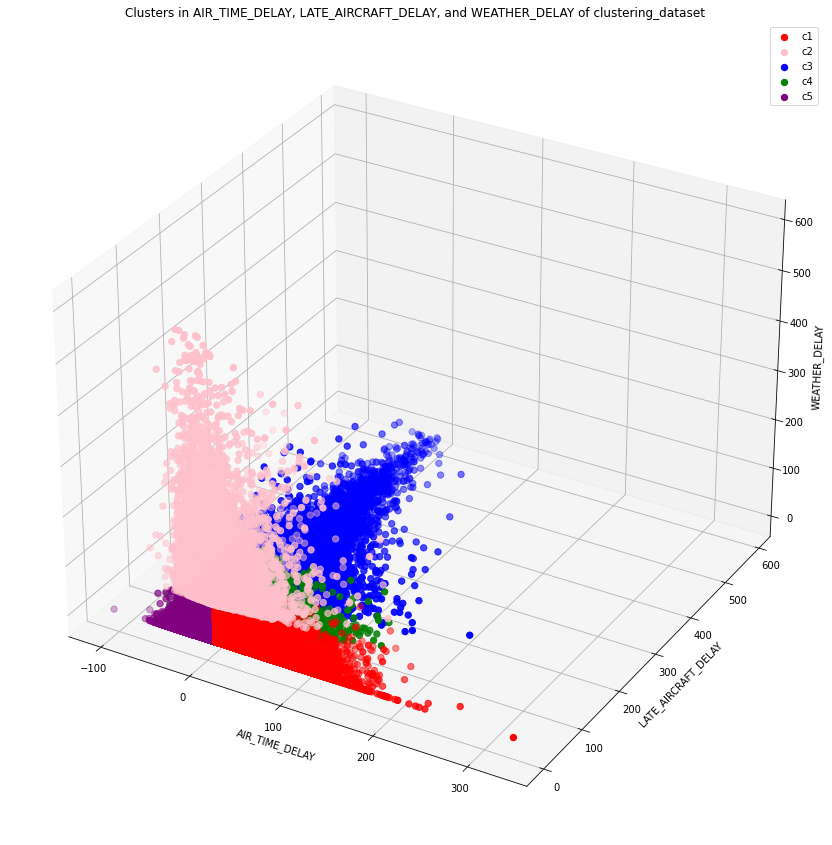

In [60]:
import matplotlib.pyplot as plt
cluster_fig = plt.figure(figsize = (15,15))
ax = cluster_fig.add_subplot(111, projection='3d')
temp = clustering_dataset[['AIR_TIME_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'cluster']]
ax.scatter(temp[temp['cluster'] == "c1"]['AIR_TIME_DELAY'], temp[temp['cluster'] == "c1"]['LATE_AIRCRAFT_DELAY'], temp[temp['cluster'] == "c1"]['WEATHER_DELAY'], s = 40 , color = 'red', label = "c1")
ax.scatter(temp[temp['cluster'] == "c2"]['AIR_TIME_DELAY'], temp[temp['cluster'] == "c2"]['LATE_AIRCRAFT_DELAY'], temp[temp['cluster'] == "c2"]['WEATHER_DELAY'], s = 40 , color = 'pink', label = "c2")
ax.scatter(temp[temp['cluster'] == "c3"]['AIR_TIME_DELAY'], temp[temp['cluster'] == "c3"]['LATE_AIRCRAFT_DELAY'], temp[temp['cluster'] == "c3"]['WEATHER_DELAY'], s = 40 , color = 'blue', label = "c3")
ax.scatter(temp[temp['cluster'] == "c4"]['AIR_TIME_DELAY'], temp[temp['cluster'] == "c4"]['LATE_AIRCRAFT_DELAY'], temp[temp['cluster'] == "c4"]['WEATHER_DELAY'], s = 40 , color = 'green', label = "c4")
ax.scatter(temp[temp['cluster'] == "c5"]['AIR_TIME_DELAY'], temp[temp['cluster'] == "c5"]['LATE_AIRCRAFT_DELAY'], temp[temp['cluster'] == "c5"]['WEATHER_DELAY'], s = 40 , color = 'purple', label = "c5")
ax.set_xlabel("AIR_TIME_DELAY")
ax.set_ylabel("LATE_AIRCRAFT_DELAY")
ax.set_zlabel("WEATHER_DELAY")
ax.set_title("Clusters in AIR_TIME_DELAY, LATE_AIRCRAFT_DELAY, and WEATHER_DELAY of clustering_dataset")
ax.legend()
plt.show()

In [165]:
import seaborn as sn
c = [clustering_dataset.query("cluster == 'c{}'".format(i))[["AIR_TIME_DELAY", "LATE_AIRCRAFT_DELAY", "WEATHER_DELAY","cluster"]] 
                                                                for i in range(1,6)]

print("{} size {}".format(c[0].cluster.unique(), len(c[0])))
print("{} size {}".format(c[1].cluster.unique(), len(c[1])))
print("\t min weather delay: {}".format(c[1]["WEATHER_DELAY"].min()))
print("\t compared to global avg: {}".format(clustering_dataset["WEATHER_DELAY"].mean()))
print("{} size {}".format(c[2].cluster.unique(), len(c[2])))
print("{} size {}".format(c[3].cluster.unique(), len(c[3])))
print("{} size {}".format(c[4].cluster.unique(), len(c[4])))

print("Things below are in percent:")
does_it_matter = clustering_dataset.query("AIR_TIME_DELAY < 0")[["AIR_TIME_DELAY", "LATE_AIRCRAFT_DELAY", "WEATHER_DELAY"]]
print("Do we fly faster? {}".format(len(does_it_matter) / len(clustering_dataset)))

print("\tDo we fly faster if aircraft was delayed? {}".format(
        len(does_it_matter.query("LATE_AIRCRAFT_DELAY > 0 ")) /
        len(does_it_matter)
    ))

print("\tDo we need aircraft delay to go faster? {}".format(
        (len(does_it_matter.query("LATE_AIRCRAFT_DELAY == 0"))
        )
        /
        len(does_it_matter)
    ))


does_it_matter = clustering_dataset.query("AIR_TIME_DELAY > 0")[["AIR_TIME_DELAY", "LATE_AIRCRAFT_DELAY", "WEATHER_DELAY"]]
print("So what if we are slower? {}".format(len(does_it_matter) / len(clustering_dataset)))

print("\tDo we fly slower with an weather delay? {}".format(
        len(does_it_matter.query("WEATHER_DELAY > 0")) /
        len(does_it_matter)
    ))

print("\tWhat if we have no weather delay? {}".format(
        len(does_it_matter.query("WEATHER_DELAY == 0 ")) /
        len(does_it_matter)
    ))

print("\tWhat if we have no delay at all? {}".format(
        len(does_it_matter.query("WEATHER_DELAY == 0 & LATE_AIRCRAFT_DELAY == 0")) /
        len(does_it_matter)
    ))




['c1'] size 215821
['c2'] size 8317
	 min weather delay: 75.0
	 compared to global avg: 2.8164022861900593
['c3'] size 26320
['c4'] size 120563
['c5'] size 436086
Things below are in percent:
Do we fly faster? 0.4831639423273494
	Do we fly faster if aircraft was delayed? 0.6464785301244984
	Do we need aircraft delay to go faster? 0.35352146987550165
So what if we are slower? 0.4901679702939016
	Do we fly slower with an weather delay? 0.06959238457299718
	What if we have no weather delay? 0.9304076154270028
	What if we have no delay at all? 0.5626867331617874


Answer: 

Lets first go through the centroids of the different clusters from 0-1:
* `AIR_TIME_DELAY`  | `WEATHER_DELAY`   | `LATE_AIRCRAFT_DELAY`
* [ 27.23365166     | 1.38169375        | 2.49412697]
* [  8.90947293     | 148.88101813      | 8.24348661]
* [ -4.12841945     | 2.44863222        | 189.66899696]
* [ -3.39030217     | 1.12263298        | 71.81693389]
* [ -5.10655663     | 1.22711763        | 10.54562028]

We are always talking about avg here, if not stated otherwise:

Having a much longer air time than planned is not mainly caused by weather or late aircraft delays! We can clearly see that flights with much longer `AIR_TIME_DELAY` have an relatively small weather and late aircraft delay. 

Going to the next cluster(c2) we see that suddenly `WEATHER_DELAY` correspond to small air time delay while the mean of `LATE_AIRCRAFT_DELAY` only increases by a really small amount. This tells us that while our flight has low `LATE_AIRCRAFT_DELAY` having really high weather delay tend to increase the `AIR_TIME_DELAY` slightly. Having a high weather delay will often occur in extreme weather situations. Here flying faster might not always be an option due to safety...

Looking at the next cluster(c3) we see that having slightly less air time than planned actually relates to high `LATE_AIRCRAFT_DELAY` while `WEATHER_DELAY`is small. This totally make sense since low `WEATHER_DELAY` indicates that the weather conditions are good. This way the pilot could possibly fly faster to compensate high `LATE_AIRCRAFT_DELAY` and so reduce the air time. 

Similar observations can be seen in cluster c4-c5. Here we have small `WEATHER_DELAY`s and medium to small `LATE_AIRCRAFT_DELAY`s which relates to negative `AIR_TIME_DELAY`. 

One more interesting fact is that many flights (0.48) have an negative `AIR_TIME_DELAY`. While having a `LATE_AIRCRAFT_DELAY` will motivate the pilot to go faster (0.64 have that delay), having a even small `WEATHER_DELAY` seems to reduce the amount of flights flying faster significantly (only 0.05 will have a reduced air time). About one third (0.35) of the faster flights don't even have an `LATE_AIRCRAFT_DELAY`. So saying that having `LATE_AIRCRAFT_DELAY` is the only motivation to travel faster is wrong!

Now if we look into the flights that had longer air time (0.49), we can see they actually often have no `LATE_AIRCRAFT_DELAY` and `AIR_TIME_DELAY` at all (0.56)! This coincide with our first observation that `LATE_AIRCRAFT_DELAY` and `WEATHER_DELAY` are not the 
main reasons for longer air time. Actually we can see that only 0.07 of slower airplanes suffer `WEATHER_DELAY`! This is a little bit contractictory as cluster c2 might imply that `WEATHER_DELAY` relates to slower airplanes while this cluster actually only consists of extrem weather situations/delays! Here we can see that it is always important to look into different metrics and statistics before making statements!
